In [1]:
from pathlib import Path
import os
import sys
current_dir = os.getcwd()
path_library = str(Path(current_dir).parent.parent)
print (path_library)

if path_library not in sys.path:
    sys.path.append(path_library)

/home/scosta/dev/luccmepy


In [12]:
from pathlib import Path
import geopandas as gpd
import pandas as pd

from luccmepy.components.topdown.potential import PotentialNeighSimpleRule
from luccmepy.components.topdown.demand import DemandPreComputedValues
from luccmepy.components.topdown.allocation import AllocationSimpleOrdering

from luccmepy import  Model, IPlotMap


In [9]:
file_name = Path(os.getcwd()) / "data" / "cs_moju.zip"



Configuração do ambiente personalizada foi realizada!
running from 2000 to 2004
[Time 4000.0 ] PotentialDNeighSimpleRule
[Time 4000.0 ] AllocationDSimpleOrdering
-------------------------------------------------------------------------------
Cell Area 1
Num of cells 5914
Initial area for land use : f -> 5706
Demand area for land use : f -> 5658
Initial area for land use : d -> 205
Demand area for land use : d -> 253
Initial area for land use : o -> 3
Demand area for land use : o -> 3
-------------------------------------------------------------------------------


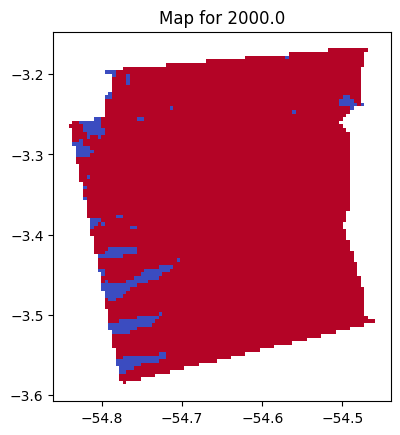

[Time 4001.0 ] AllocationDSimpleOrdering
-------------------------------------------------------------------------------
Cell Area 1
Num of cells 5914
Initial area for land use : f -> 5658
Demand area for land use : f -> 5611
Initial area for land use : d -> 253
Demand area for land use : d -> 300
Initial area for land use : o -> 3
Demand area for land use : o -> 3
-------------------------------------------------------------------------------


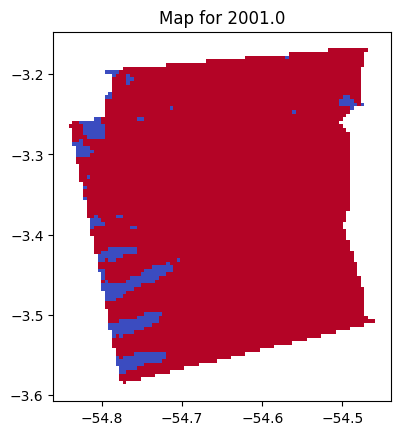

[Time 4002.0 ] PotentialDNeighSimpleRule
[Time 4002.0 ] AllocationDSimpleOrdering
-------------------------------------------------------------------------------
Cell Area 1
Num of cells 5914
Initial area for land use : f -> 5611
Demand area for land use : f -> 5563
Initial area for land use : d -> 300
Demand area for land use : d -> 348
Initial area for land use : o -> 3
Demand area for land use : o -> 3
-------------------------------------------------------------------------------


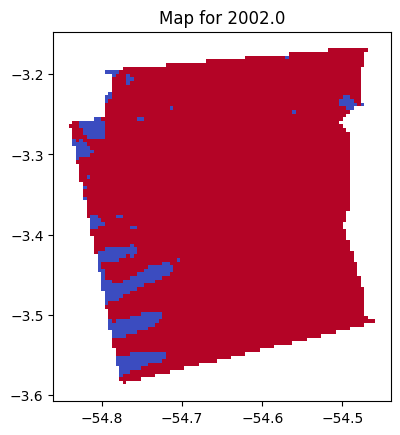

[Time 4003.0 ] AllocationDSimpleOrdering
-------------------------------------------------------------------------------
Cell Area 1
Num of cells 5914
Initial area for land use : f -> 5563
Demand area for land use : f -> 5516
Initial area for land use : d -> 348
Demand area for land use : d -> 395
Initial area for land use : o -> 3
Demand area for land use : o -> 3
-------------------------------------------------------------------------------


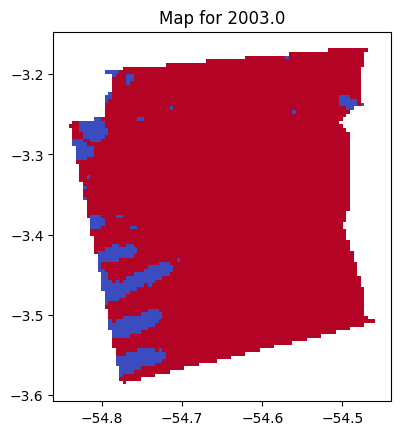

[Time 4004.0 ] PotentialDNeighSimpleRule
[Time 4004.0 ] AllocationDSimpleOrdering
-------------------------------------------------------------------------------
Cell Area 1
Num of cells 5914
Initial area for land use : f -> 5516
Demand area for land use : f -> 5468
Initial area for land use : d -> 395
Demand area for land use : d -> 443
Initial area for land use : o -> 3
Demand area for land use : o -> 3
-------------------------------------------------------------------------------


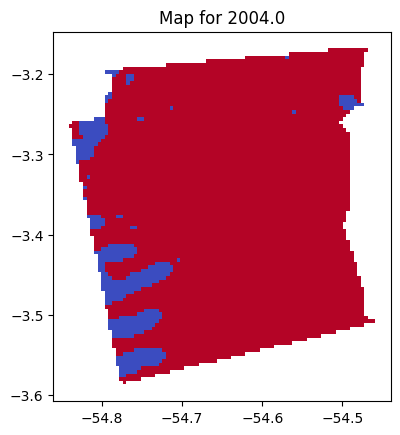

In [13]:
env = Model(
    gdf = gpd.read_file(file_name),
    startTime=2000,
    endTime = 2004
)

env.landUseTypes = ["f", "d", "o"]
env.cellarea = 1

env.potential = PotentialNeighSimpleRule(create_neighbohood="Queen")

# Caminho do arquivo de demanda
csv_path = Path(os.getcwd()) / "data" / "moju_annual_demand.csv" 

env.demand = DemandPreComputedValues(
        annualDemand=pd.read_csv(csv_path, index_col="Year")
)

env.allocation = AllocationSimpleOrdering()

IPlotMap( clear = False,
    plot_params={ "column": "f","cmap": "coolwarm"}
)

env.run()
